In [0]:
import torch
import numpy as np

In [2]:
# cannot use np.float32 or np.float64 with torch tensors
a = torch.arange(0, 50, step=1, dtype=torch.float64).reshape(10,5)
print(a)
print(a.dtype)
print(a.shape)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]], dtype=torch.float64)
torch.float64
torch.Size([10, 5])


In [0]:
numpy_style_a = a.numpy() # convert to numpy style array

In [4]:
numpy_style_a

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.],
       [25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34.],
       [35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44.],
       [45., 46., 47., 48., 49.]])

In [5]:
# convert numpy to torch style tensor
numpy_style_to_torch_style_a = torch.from_numpy(numpy_style_a)
print(numpy_style_to_torch_style_a)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]], dtype=torch.float64)


In [0]:
a = torch.from_numpy(np.random.randn(5, 3)) # Lets generate 2 random tensors
b = torch.from_numpy(np.random.randn(3, 5)) # and operate on them

In [7]:
print(f"{a}\n{b}")

tensor([[-0.1307, -1.2265, -0.2573],
        [ 0.8084,  0.8649, -0.9348],
        [-0.6927, -0.6982, -0.3498],
        [ 0.5369, -1.2325,  0.6463],
        [ 0.1248, -0.8058,  1.8803]], dtype=torch.float64)
tensor([[ 0.0721, -0.8766, -0.6709,  1.0116, -0.0801],
        [ 0.3031,  0.1315, -0.6130,  1.5394,  0.9872],
        [ 0.2359, -0.1943,  1.3411,  1.4563, -0.4084]], dtype=torch.float64)


In [8]:
# to add,subtract use a+b,a-b
# for matrix multiplication
c = a @ b # @ -> matrix multiplication
print(c)
c = torch.mm(a, b) # Equivalent to a@b
print(c)

tensor([[-0.4419,  0.0033,  0.4945, -2.3951, -1.0953],
        [ 0.0999, -0.4132, -2.3263,  0.7879,  1.1709],
        [-0.3441,  0.5833,  0.4236, -2.2850, -0.4910],
        [-0.1824, -0.7584,  1.2620, -0.4129, -1.5236],
        [ 0.2083, -0.5807,  2.9319,  1.6239, -1.5735]], dtype=torch.float64)
tensor([[-0.4419,  0.0033,  0.4945, -2.3951, -1.0953],
        [ 0.0999, -0.4132, -2.3263,  0.7879,  1.1709],
        [-0.3441,  0.5833,  0.4236, -2.2850, -0.4910],
        [-0.1824, -0.7584,  1.2620, -0.4129, -1.5236],
        [ 0.2083, -0.5807,  2.9319,  1.6239, -1.5735]], dtype=torch.float64)


In [0]:
# making tensors on GPU :o
# See the RAM bar will increase as soon as we create a tensor on GPU
a_gpu = torch.arange(0, 50, dtype=torch.float64, device='cuda').reshape(5, 10)

In [10]:
a_gpu

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]], device='cuda:0',
       dtype=torch.float64)

In [11]:
# torch.is_tensor
print(torch.is_tensor([1., 2., 3.]))
print(torch.is_tensor(a))

False
True


In [12]:
# torch.set_default_dtype -> set floating point dtype
torch.set_default_dtype(torch.float64)
a = torch.linspace(0, 10, 100)
print(a.dtype)
# torch.get_default_dtype
print(torch.get_default_dtype())

torch.float64
torch.float64


In [13]:
# torch.numel -> same as np.ndarray.size
print(torch.numel(a))

100


In [14]:
# torch.tensor -> Similar to np.array(data)
# ``torch.tensor`` always copies ``data``. To avoid copying
# np.ndarray use ``torch.as_tensor`` instead
a = torch.tensor([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]], device='cuda')
print(a)

# You can also record gradients on the
# operations invloving `a` by setting require_grad=True
a = torch.tensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]], device='cuda', requires_grad=True)
b = torch.tensor([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]], device='cuda', requires_grad=True)
# Operate on a and b
c = (a @ b).sum()
# The graph formed is:
# a     b
#  \   /
#    c (op: SumBackward)
print(c.grad_fn)
print(c.backward()) # This just calculates the gradient of c wrt all the nodes in the graph
print(a.grad)
print(b.grad)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
None
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[12., 12., 12.],
        [15., 15., 15.],
        [18., 18., 18.]], device='cuda:0')


In [15]:
# torch.sparse_coo_tensor -> create a sparse tensor ==> amazing
a = torch.sparse_coo_tensor(torch.empty([1, 0]),
                            torch.empty([0, 2]), [1, 2])
print(a)

tensor(indices=tensor([], size=(1, 0)),
       values=tensor([], size=(0, 2)),
       size=(1, 2), nnz=0, layout=torch.sparse_coo)


In [0]:
# torch.as_tensor  -> create a tensor from np.ndarray
# torch.as_strided -> np.lib.stride_tricks.as_strided
# torch.from_numpy -> as the name suggest
# torch.zeros
# torch.zeros_like
# torch.ones
# torch.ones_like
# torch.empty
# torch.empty_like
# torch.full
# torch.full_like
# torch.arange
# torch.linspace
# torch.logspace
# torch.eye
# torch.empty_strided
# torch.cat -> np.concatenate
# torch.chunk -> Splits a tensor into a specific number of chunks.
#                Each chunk is a view of the input tensor
# torch.reshape
# torch.stack
# torch.t -> same as np.ndarray.T ==> Use `torch.tensor.T` instead
# torch.transpose
# torch.take -> same as np.take
# torch.where -> same as np.where

In [17]:
# torch.gather -> Gathers values along an axis specified by `dim` (`axis`)
a = torch.arange(10)
a_gather = torch.gather(a, dim=0, index=torch.tensor([0, 0, 1, 1, 6, 5, 9, 5, 6, 7]))
print(a_gather)
t = torch.tensor([[1,2],[3,4]])
print(torch.gather(t, 1, torch.tensor([[0,0],[1,0]])))

tensor([0, 0, 1, 1, 6, 5, 9, 5, 6, 7])
tensor([[1, 1],
        [4, 3]])


In [18]:
# torch.index_seelct -> select the indices along a given `dim` (`axis`)
# This operation creates a copy if the `out` argument is not the same shape
# as the input tensor.
a = torch.randn(3, 4)
print(a)
torch.index_select(a, 0, torch.tensor([0, 2]))

tensor([[ 1.8138, -1.6075, -0.2263,  1.1918],
        [ 1.0004,  0.5787, -1.0218,  0.5546],
        [ 0.6320, -0.3689,  2.0017, -0.2749]])


tensor([[ 1.8138, -1.6075, -0.2263,  1.1918],
        [ 0.6320, -0.3689,  2.0017, -0.2749]])

In [19]:
# torch.masked_select -> selects the masked entries only.
# Always creates a copy.
a = torch.randn(3, 4)
print(a)
torch.masked_select(a, a<=0)

tensor([[ 1.5467, -0.1766,  2.1532,  1.2930],
        [ 0.1260, -0.4382,  1.0440, -0.3801],
        [-2.2948,  0.8406,  0.2105, -1.3414]])


tensor([-0.1766, -0.4382, -0.3801, -2.2948, -1.3414])

In [20]:
# torch.narrow -> Select the entires from the array
# along a particular `dim` starting at `start` and
# ending at `end`. Signature: input, dim, start, end.
# Its a view, not a copy
a = torch.randn(3, 4)
print(a)
torch.narrow(a, 0, 1, 2) # 2 inclusive

tensor([[ 0.8803,  0.6273,  0.4604,  0.0672],
        [-0.2596, -0.5898,  0.8850,  0.8675],
        [ 0.7572, -0.7520,  1.2238, -0.5357]])


tensor([[-0.2596, -0.5898,  0.8850,  0.8675],
        [ 0.7572, -0.7520,  1.2238, -0.5357]])

In [21]:
# torch.reshape -> Creates a view whenever possible
# use torch.as_strided for garunteed view.
a = torch.randn(1, 2, 3, 4, 5)
print(a.shape)
torch.reshape(a, [5, 4, 3, 2, 1]).shape

torch.Size([1, 2, 3, 4, 5])


torch.Size([5, 4, 3, 2, 1])

In [22]:
# torch.split -> Splits the tensor into chunks.
# Each chunk is a view of the original tensor.
a = torch.randn(3, 5)
print(a)
print(torch.split(a, [1, 4], dim=1)[0])
print(torch.split(a, [1, 4], dim=1)[1])

tensor([[-0.2909, -0.8594,  0.5405,  0.2805, -1.1462],
        [ 0.6899, -0.9686,  0.2591, -0.2129,  0.1239],
        [-0.7620,  0.3153, -0.9378,  0.3468, -1.3720]])
tensor([[-0.2909],
        [ 0.6899],
        [-0.7620]])
tensor([[-0.8594,  0.5405,  0.2805, -1.1462],
        [-0.9686,  0.2591, -0.2129,  0.1239],
        [ 0.3153, -0.9378,  0.3468, -1.3720]])


In [23]:
# torch.squeeze -> same as np.squeeze
a = torch.randn(5, 1, 1, 4, 1, 1, 3, 1, 1, 2)
print(a.shape)
b = torch.squeeze(a)
print(b.shape)
# torch.unsqueeze -> wow!
torch.unsqueeze(b, -1).shape

torch.Size([5, 1, 1, 4, 1, 1, 3, 1, 1, 2])
torch.Size([5, 4, 3, 2])


torch.Size([5, 4, 3, 2, 1])

In [24]:
# torch.where -> if `condition`, `x`, else `y`
a = torch.tensor([[1, 2], [3, 4]])
torch.where(a>2, a, 1-a)

tensor([[ 0, -1],
        [ 3,  4]])

In [0]:
#                       Random Sampling in Torch!!
# torch.seed
# torch.set_rng_state
# torch.get_rng_state
# torch.rand
# torch.rand_like
# torch.randint
# torch.randint_like
# torch.randn
# torch.randn_like
# torch.randperm -> Returns a random permutation of integers from `0` to `n-1`.
# torch.bernoulli
# torch.multinomial
# torch.poisson
# torch.normal

#                       Inplace Random Sampling
# =========================     =========================================================
#         CODE                                         DOCUMENTATION
# =========================     =========================================================
# torch.Tensor.bernoulli_()   - in-place version of torch.bernoulli()
# torch.Tensor.cauchy_()      - numbers drawn from the Cauchy distribution
# torch.Tensor.exponential_() - numbers drawn from the exponential distribution
# torch.Tensor.geometric_()   - elements drawn from the geometric distribution
# torch.Tensor.log_normal_()  - samples from the log-normal distribution
# torch.Tensor.normal_()      - in-place version of torch.normal()
# torch.Tensor.random_()      - numbers sampled from the discrete uniform distribution
# torch.Tensor.uniform_()     - numbers sampled from the continuous uniform distribution

In [26]:
# Serialization
# torch.save -> Saves tensor objects and model in pickle file
# torch.load -> Loads tensor objects and model from a pickle file
a = torch.arange(10)
torch.save(a, 'torch_tensor_a.pkl')
a = torch.load('torch_tensor_a.pkl')
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
# Parallelism
# torch.get_num_threads()
# torch.set_num_threads()
# torch.get_num_inteop_threads()
# torch.set_num_interop_threads()
print(torch.get_num_threads())
torch.set_num_threads(4)
print(torch.get_num_threads())
torch.set_num_threads(1)
print(torch.get_num_threads())

1
4
1


In [28]:
# torch.no_grad() -> Context manager to disable backprop for
#                    some particular operation. This means that
#                    the operation will not be recorded on graph.
a = torch.arange(10, requires_grad=True, dtype=torch.float32, device='cuda')
b = torch.arange(10, 20, requires_grad=True, dtype=torch.float32, device='cuda')
with torch.no_grad():
    c = a * b
print(c.requires_grad)

False


In [29]:
# torch.enable_grad() -> Enablewe grad for operations where grad computation
#                        has been altered using torch.no_grad or torch.set_grad_enabled
# Method 1
a = torch.arange(10, requires_grad=True, dtype=torch.float32, device='cuda')
b = torch.arange(10, 20, requires_grad=True, dtype=torch.float32, device='cuda')
with torch.no_grad():
    with torch.enable_grad():
        c = a * b
print(c.requires_grad)

# Method 2
@torch.enable_grad()
def mul_op(x, y):
    return x * y

with torch.no_grad():
    c = mul_op(a, b)
print(c.requires_grad)

True
True


In [0]:
# Math operations
# torch.abs
# torch.acos
# torch.asin
# torch.atan
# torch.atan2
# torch.sin
# torch.cos
# torch.cosh
# torch.tanh
# torch.sinh
# torch.tan
# torch.exp
# torch.log
# torch.log10
# torch.log2
# torch.pow
# torch.div
# torch.add
# torch.mul
# torch.reciprocal
# torch.remainder
# torch.round
# torch.rsqrt
# torch.sqrt
# torch.sigmoid
# torch.sign
# torch.square
# torch.true_devide
# torch.trunc -> truncate a floting point into integer
# torch.argmax
# torch.argmin
# torch.max
# torch.min
# torch.dist -> Computes the p-norm of a tensor (default p=2)
# torch.logsumexp
# torch.mean
# torch.median
# torch.mode
# torch.std
# torch.std_mean
# torch.var
# torch.var_mean
# torch.sum
# torch.prod
# torch.cumsum
# torch.cumprod
# torch.unique
# torch.diag -> same as np.diag
# torch.cholesky
# torch.cholesky_solve
# torch.solve
# torch.triangular_solve
# torch.lu
# torch.lu_solve
# torch.qr
# torch.svd
# torch.scd_lowrank
# torch.pca_lowrank
# torch.symeig -> Eigenvalues and vectors for symetric matrices
# torch.matrix_power
# torch.matrix_rank
# torch.eig
# torch.det
# torch.logdet
# torch.slogdet
# torch.trace
# torch.tril -> Returns the lower triangular part of input
# torch.triu
# torch.lstsq
# torch.inverse  -> same as np.inv
# torch.pinverse -> same as np.pinv
# torch.flatten
# torch.norm -> Computes the norm of a matrix or vector
# torch.add -> Can be used as axpy but for tensors
# torch.addcdiv -> Performs the element-wise division of `tensor1` by `tensor2`,
#                  multiply the result by the scalar `value` and add it to `input`
#                  result = input + value * (tensor1 / tensor2)
# torch.addcmul -> Same as addcdiv but for multiplecation
# torch.bitwise_not -> oeprator |
# torch.bitwise_and -> operator &
# torch.bitwise_not
# torch.bitwise_xor
# torch.ceil
# torch.floor
# torch.angle -> Commutes the angle of each vector (complex number function)
# torch.conj -> Computes the conjugate of each vector (complex number function)

In [31]:
# torch.clamp -> works like `np.clip`. Clips a tensor in [min, max] range
a = torch.arange(0, 20)
print(a)
a = torch.clamp(a, min=5, max=15)
print(a)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])
tensor([ 5,  5,  5,  5,  5,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 15, 15,
        15, 15])


In [0]:
# Advanced Mathematical Operations
# torch.digamma -> Derivative of log of gamma function => d/dx ( ln(gamma(input)) )
# torch.erf -> Error function
# torch.erfc -> Complement of the error function
# torch.erfinv -> Inverse of the error function
# torch.exp
# torch.expm1
# torch.log1p -> inverse of torch.expm1
# torch.floor_devide
# torch.fmod -> Float %
# torch.frac -> Computes the fractional portion of each element in `input`
# torch.lerp -> out = start + weight * (end - start)
# torch.lgamma -> Logirithm of the gamma function
# torch.mvlgamma -> Compute the multivariate log gamma function
# torch.polygamma -> Compute the n'th derivative of `torch.digamma` function

In [0]:
# Comparison Ops
# torch.equal
# torch.eq
# torch.ne
# torch.ge
# torch.le
# torch.gt
# torch.lt
# torch.allclose
# torch.isfinite
# torch.isinf
# torch.isnan
# torch.kthvalue

In [0]:
# torch.sort
# torch.argsort
# torch.topk
# torch.kthvalue

In [0]:
# TODO: BLAS and LAPACK functions

In [36]:
#################################################################################
#                                                                               #
#                           NEURAL NETWORKS IN PYTORCH                          #
#                                                                               #
#################################################################################
from torch import nn
from torch.nn import functional as F
torch.set_default_dtype(torch.float32)
torch.seed(42)

TypeError: ignored

In [0]:
# torch.nn.Parameter -> Registers a parameter in the scope of the module.
#                       Doesn't backpropogate if used in or from other module,
#                       unless registered.
a = torch.randn(4, 5)
print(a)
nn.Parameter(a)

In [0]:
# torch.nn.module -> A class to create your NN. Define `__init__` to
#                    initialize model parameters and `forward` method
#                    to define operations on the parameters and input.
#                    Registered parameters will be backpropogated while
#                    training.
class LinearRegressor(nn.Module):
    def __init__(self, n_features):
        super(LinearRegressor, self).__init__()
        self.w = nn.Parameter(torch.randn(n_features, 1))
        self.b = nn.Parameter(torch.randn(1))

    def forward(self, X):
        return X @ self.w + self.b

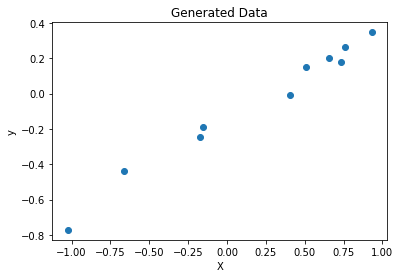

In [38]:
# Preparing Data
import matplotlib.pyplot as plt
n_examples = 10
n_features = 1
X = torch.randn(n_examples, n_features)
w_true = torch.randn(n_features, 1)
b_true = torch.randn(1)
y_true = X @ w_true + b_true + 0.1 * torch.randn(n_examples, 1)
plt.scatter(X, y_true)
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [39]:
# Initialize the LinearRegressor model.
model = LinearRegressor(n_features)
print(model(X))
# .parameters() `yields` the parameters.
# Not a list of parameters.
print([i for i in model.parameters()])

tensor([[ 0.2805],
        [ 1.0515],
        [ 0.9613],
        [ 1.1956],
        [ 0.2658],
        [-0.1470],
        [ 1.0280],
        [-0.4521],
        [ 0.7524],
        [ 0.8356]], grad_fn=<AddBackward0>)
[Parameter containing:
tensor([[0.8412]], requires_grad=True), Parameter containing:
tensor([0.4103], requires_grad=True)]


In [40]:
# Training a torch.nn.Module() model
from time import sleep
from sys import stdout
epochs = 200
# torch.nn contains many loss functions. We use
# mse loss with mean over all the examples.
loss_fn = nn.MSELoss(reduction='mean')
# torch.optim contains many optimizers like Adam, Momentum
# SGD, Adagrad, Adadelta, RMSProp, Nesterov Momentum, etc
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Let's define our training loop now!
for i in range(epochs):
    y_pred = model(X) # Compute the prediction by forward propogating

    loss = loss_fn(y_pred, y_true) # Evaluate the loss function
    # Print the loss
    stdout.write(f'\repoch: {i} \t {20*""}')
    stdout.write(f'\repoch: {i} \t loss: {loss.item():.3f}')
    optimizer.zero_grad() # Initialize the optimizer
    # Backpropogate through the graph. This will compute the
    # gradients of all the parameters in-place and store them
    # in .grad() method of the parameters.
    loss.backward()
    optimizer.step() # Take one step of optimizer. This will update our parameters.
    sleep(0.2)

epoch: 199 	 loss: 0.003

In [41]:
# Let's see how good did we perform
print(w_true)
print(b_true)
params = [i for i in model.parameters()]
print(params[0])
print(params[1])
print(y_true)
print(model(X))

tensor([[0.5834]])
tensor([-0.1838])
Parameter containing:
tensor([[0.5585]], requires_grad=True)
Parameter containing:
tensor([-0.1567], requires_grad=True)
tensor([[-0.1867],
        [ 0.2643],
        [ 0.2029],
        [ 0.3468],
        [-0.2486],
        [-0.4373],
        [ 0.1759],
        [-0.7716],
        [-0.0092],
        [ 0.1486]])
tensor([[-0.2429],
        [ 0.2690],
        [ 0.2091],
        [ 0.3647],
        [-0.2527],
        [-0.5267],
        [ 0.2534],
        [-0.7293],
        [ 0.0704],
        [ 0.1257]], grad_fn=<AddBackward0>)
